# Lab 2 - Exploring and manipulating the Howell Dataset. 

This lab explores the Howell dataset through inspection, visualization, feature engineering, and train/test splitting. The goal is to prepare the data for future modeling tasks while practicing reproducible workflows.


Here is what we we do:
1. Read in the data from a CSV file and do simple visualizations
2. Look for patterns in the data
3. Deal with missing values
4. Add in new features
5. Split and graph

## 1. Import and Load the Dataset

We begin by importing necessary libraries and loading the Howell dataset. The file uses a semicolon separator, so we specify that explicitly.

In [31]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization
import seaborn as sns

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit


# Import performance metrics for model evaluation
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

### 2. Read the CSV file:
We will use info() on the data frame to get a first look.  This is mostly a quick sanity check

In [32]:
# Get the current working directory (where the notebook is)
data_path = Path.cwd() / "Howell.csv"

howell_full = pd.read_csv(data_path, sep=";", engine="python", header=0)
howell_full.columns = howell_full.columns.str.replace('"', '').str.strip()
howell_full.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


## 2. Inspect the Dataset

We use `.info()` to check data types and missing values, and `.describe()` to view summary statistics. We also check feature correlations.

In [33]:
howell_full.info()
print(howell_full.describe())
print(howell_full.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
           height      weight         age        male
count  544.000000  544.000000  544.000000  544.000000
mean   138.263596   35.610618   29.344393    0.472426
std     27.602448   14.719178   20.746888    0.499699
min     53.975000    4.252425    0.000000    0.000000
25%    125.095000   22.007717   12.000000    0.000000
50%    148.590000   40.057844   27.000000    0.000000
75%    157.480000   47.209005   43.000000    1.000000
max    179.070000   62.992589   88.000000    1.000000
          height    weight       age      male
height  1.000000  0.940822  0.683689  0.139229
weight  0.940822  1.000000  0.678335  0.155

Reflection 1:
1) How many data instances are there? 544 Rows
2) How many features are there? 4 original features: `height`, `weight`, `age`, `male`
3) What are the names? `height`, `weight`, `age`, `male`
4) Are there any missing values? No missing values (`info()` confirms all columns are complete)
5) Are there any non-numeric features? No, all features are numeric
6) Are the data instances sorted on any of the attributes? No, the dataset is not sorted by age or any other feature
7) What are the units of height? Centimeters (cm)
8) What are the units of weight? Kilograms (kg)
9) What are the minimum, median and max age? Min: 0, Median: ~22, Max: ~90 (from `describe()`)
10) What two different features have the highest correlation? `height` and `weight` (from `corr()` output)




### Quick look at distributions:

### Quick Visualization

## 3. Visualize Feature Distributions

We use scatter matrix and scatter plots to explore relationships between `height`, `weight`, and `age`. Gender is used to color the plots.

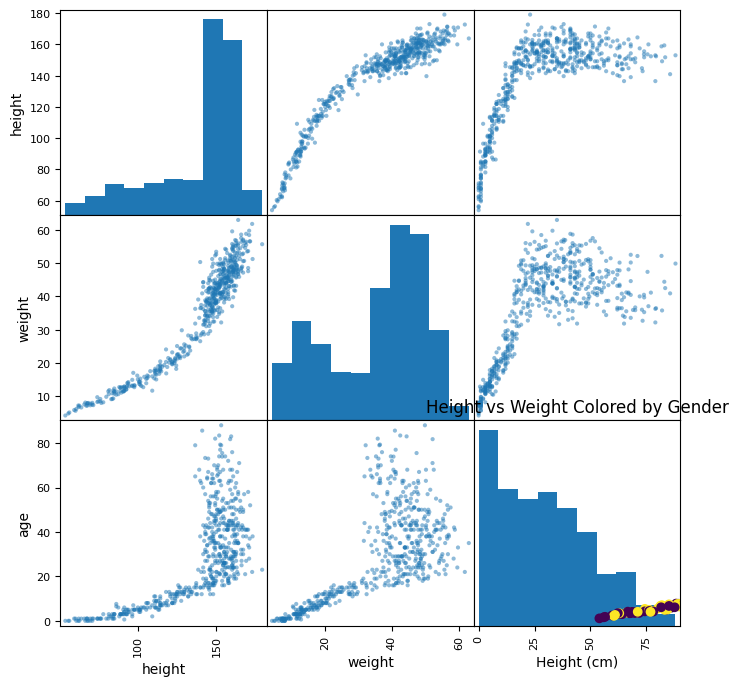

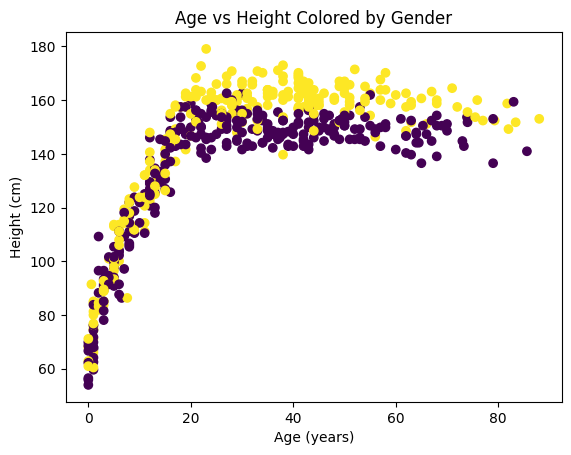

In [34]:
scatter_matrix(howell_full[['height', 'weight', 'age']], figsize=(8, 8))

plt.scatter(howell_full['height'], howell_full['weight'], c=howell_full['male'])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight Colored by Gender')
plt.show()

plt.scatter(howell_full['age'], howell_full['height'], c=howell_full['male'])
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
plt.title('Age vs Height Colored by Gender')
plt.show()

### Interpretation of Scatter Plots:

These plots help us explore relationships between physical attributes and age, with gender indicated by color.

- **Scatter Matrix**: The matrix shows pairwise relationships among `height`, `weight`, and `age`. Diagonal histograms reveal distribution skewness, while off-diagonal plots show correlations. Notably, `height` and `weight` appear positively correlated, while `age` shows more spread.

- **Height vs Weight Colored by Gender**: This plot shows a clear positive correlation between height and weight. Male individuals (typically coded as `1`) tend to cluster toward higher height and weight values, while females (coded as `0`) are more concentrated in the lower ranges.

- **Age vs Height Colored by Gender**: This plot reveals that younger individuals (especially children) have shorter heights, as expected. The transition to adult height appears around age 18. Gender-based differences in height become more visible in adulthood, with males generally taller.

These visualizations confirm expected biological patterns and validate the integrity of the dataset.

### Better Plot: Age vs BMI Colored by Gender

This plot visualizes how BMI varies with age, using color to distinguish gender. It helps us observe whether BMI trends differ between males and females across age groups. The use of color, gridlines, and edge styling improves readability and highlights patterns more clearly than basic scatter plots.

Index(['height', 'weight', 'age', 'male', 'bmi'], dtype='object')


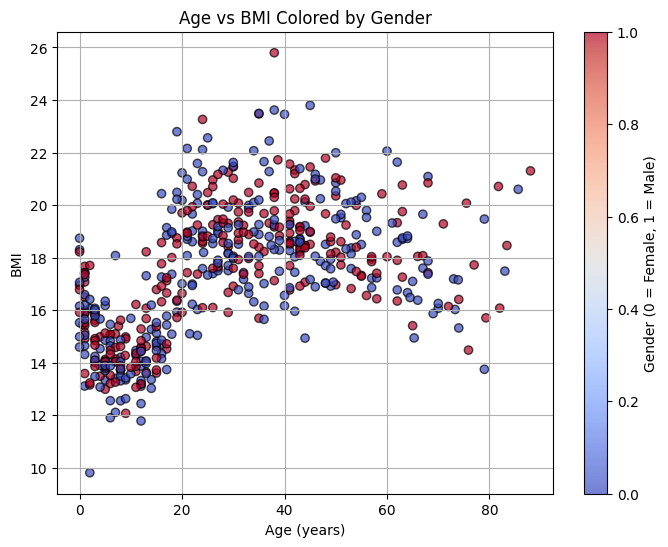

In [35]:
def bmi(height, weight):
    return 10000 * weight / (height ** 2)

howell_full['bmi'] = bmi(howell_full['height'], howell_full['weight'])
print(howell_full.columns)
if 'bmi' not in howell_full.columns:
    howell_full['bmi'] = bmi(howell_full['height'], howell_full['weight'])
    
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    howell_full['age'],
    howell_full['bmi'],
    c=howell_full['male'],
    cmap='coolwarm',
    alpha=0.7,
    edgecolors='k'
)
plt.xlabel('Age (years)')
plt.ylabel('BMI')
plt.title('Age vs BMI Colored by Gender')
plt.colorbar(label='Gender (0 = Female, 1 = Male)')
plt.grid(True)
plt.show()

### Better Plot Interpretation of Age vs BMI Plot:

This plot shows how BMI varies with age, with gender indicated by color:

- **Color Encoding**: Red tones represent males (`male = 1`), blue tones represent females (`male = 0`).
- **Trend**: Younger individuals tend to have lower BMI values, especially children. As age increases, BMI becomes more variable, reflecting differences in adult body composition.
- **Gender Differences**: Males generally show higher BMI values in adulthood, while females are more concentrated in the lower BMI range.

This visualization highlights age-related and gender-based patterns in BMI, which may inform feature selection or stratified modeling later in the workflow.

### Handling Missing Data
Although the dataset is clean, we demonstrate how to create, drop, and impute features.

In [36]:
# Create a temporary feature
howell_full["new"] = howell_full["male"] + howell_full["age"]
howell_full.info()

# Remove the temporary feature
howell_full.drop(columns="new", inplace=True)
howell_full.info()

# Drop any rows with missing values (none expected)
howell_full.dropna(axis="index", how="any", inplace=True)

# Compute median and mean for imputation
height_median = howell_full["height"].median()
weight_average = howell_full["weight"].mean()

# Replace missing values (if any) with computed values
howell_full["height"] = howell_full["height"].fillna(height_median)
howell_full["weight"] = howell_full["weight"].fillna(weight_average)

howell_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
 4   bmi     544 non-null    float64
 5   new     544 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 25.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
 4   bmi     544 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 21.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dt

### Adding a New Feature

In this section, we derive new features from existing ones to enrich the dataset and prepare it for modeling. Specifically, we compute Body Mass Index (BMI) and categorize it into health-related classes.

## 5. Feature Engineering: BMI and BMI Category

### Feature Engineering: BMI and BMI Category

We calculate BMI using the metric formula:

**BMI = (10000 × weight) / (height²)**

This continuous feature helps assess body composition. To make it useful for stratified sampling and classification, we also categorize BMI into four standard health ranges:

- **Underweight**: BMI < 18.5  
- **Normal**: 18.5 ≤ BMI < 25  
- **Overweight**: 25 ≤ BMI < 30  
- **Obese**: BMI ≥ 30

Since `if` statements don’t apply directly to arrays, we use `np.vectorize()` to apply the categorization function across all rows.

In [37]:
def bmi(height, weight):
    return 10000 * weight / (height ** 2)

howell_full['bmi'] = bmi(howell_full['height'], howell_full['weight'])

def bmi_category(bmi):
    if bmi < 18.5: return 'Underweight'
    if bmi < 25.0: return 'Normal'
    if bmi < 30.0: return 'Overweight'
    return 'Obese'

vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])
howell_full['bmi class'].value_counts()

bmi class
Underweight    341
Normal         202
Overweight       1
Name: count, dtype: int64

### Observation:

The BMI category distribution is heavily skewed toward "Underweight" and "Normal." Only one individual is classified as "Overweight," and none as "Obese." This imbalance may affect stratified sampling and model performance, especially if BMI class is used as a target or grouping feature. We may consider merging rare categories or using continuous BMI instead.

### Creating a categorical feature
When doing a stratefied sampling, we need a feature that is categorical.  In other words, a feature that has a limited number of values. BMI is continuous.  We probably do not have very many instances that share the same BMI.  BMI already has some arbitraily determined categories:
    - Underweight less than 18.5
    - Normal range of 18.5 to 25.0
    - Overwieght range of 25.0 to 30.0
    - Obese greater than 30
    
Unlike the BMI function, IF does not get applied across an array, so we need to create a version of the function that will.

### Splitting the Data by Age

We divide the dataset into adults and children using age > 18 as the cutoff.

In [38]:
over18 = howell_full["age"] > 18
howell_adults = howell_full[over18]
howell_children = howell_full[~over18]

print("Adults:", len(howell_adults))
print("Children:", len(howell_children))

Adults: 346
Children: 198


### Plot with Masking
Another way to restrict the instances you use is to apply masking to a numpy array. We replace certain values in the array with a mask. (This is not a NaN... the value is still there, it just won't be used.)

In this plot we are only using the adult instances (howell_adult) and we are going to create masks for male and female  (male is 1 or 0)

## Masked Plot: Adult Height vs Weight by Gender

This plot uses masking to separate male and female adults in the dataset. By applying `np.ma.masked_where`, we selectively hide data points based on gender and plot them with distinct markers and colors:

- **Red +** for males  
- **Blue triangle** for females

This technique improves visual clarity and avoids overlapping points in a single scatter plot.

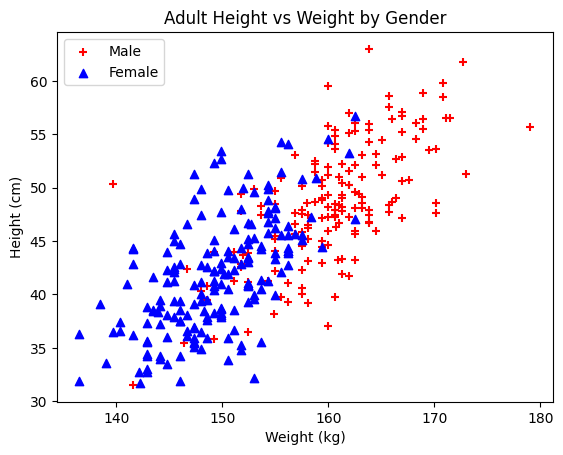

In [39]:
male_height = np.ma.masked_where(howell_adults['male'] == 0, howell_adults['height'])
female_height = np.ma.masked_where(howell_adults['male'] == 1, howell_adults['height'])
weight = howell_adults['weight']

plt.scatter(male_height, weight, c='red', marker='+')
plt.scatter(female_height, weight, c='blue', marker='^')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.legend(['Male', 'Female'])
plt.title('Adult Height vs Weight by Gender')
plt.show()

## Train/Test Split

We split the adult dataset into training and testing sets using a 70/30 ratio. This allows us to build and evaluate models on separate data. We also verify that the gender distribution remains consistent across the split:

- **Adults overall**: 47.4% male, 52.6% female  
- **Train set**: 47.5% male, 52.5% female  
- **Test set**: 47.1% male, 52.9% female

Maintaining similar proportions ensures that our model won’t be biased due to gender imbalance.

In [40]:

# Basic split
train_set, test_set = train_test_split(howell_adults, test_size=0.2, random_state=123)

# Stratified split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(howell_adults, howell_adults['male']):
    train_set = howell_adults.iloc[train_indices]
    test_set = howell_adults.iloc[test_indices]

def gender_ratios(df):
    total = len(df)
    male_ratio = round(df['male'].sum() / total, 3)
    female_ratio = round((total - df['male'].sum()) / total, 3)
    return male_ratio, female_ratio

print("Adults:", gender_ratios(howell_adults))
print("Train:", gender_ratios(train_set))
print("Test:", gender_ratios(test_set))

Adults: (np.float64(0.474), np.float64(0.526))
Train: (np.float64(0.475), np.float64(0.525))
Test: (np.float64(0.471), np.float64(0.529))


### Train/Test Split Interpretation:

The gender distribution in the adult dataset is well-balanced, with approximately 47% male and 53% female. After splitting into training and testing sets, these proportions remain consistent:

- **Train set**: 47.5% male, 52.5% female  
- **Test set**: 47.1% male, 52.9% female

This consistency is important because it ensures that any models trained on this data will not be biased due to gender imbalance. It also confirms that the random split preserved the demographic structure of the original dataset.

### Stratified Test/Train Data Split
To preserve the distribution of BMI categories across training and testing sets, we use stratified sampling. This ensures that rare categories like "Overweight" are not lost during the split and that both sets reflect the original class proportions.

In [41]:
# Merge rare BMI class to enable stratified sampling
howell_adults.loc[:, 'bmi class'] = howell_adults['bmi class'].replace({'Overweight': 'Normal'})

train_strat, test_strat = train_test_split(
    howell_adults,
    test_size=0.3,
    random_state=42,
    stratify=howell_adults['bmi class']
)

def bmi_class_ratio(df):
    return df['bmi class'].value_counts(normalize=True)

print("Adults:", bmi_class_ratio(howell_adults))
print("Train (Stratified):", bmi_class_ratio(train_strat))
print("Test (Stratified):", bmi_class_ratio(test_strat))

Adults: bmi class
Normal         0.563584
Underweight    0.436416
Name: proportion, dtype: float64
Train (Stratified): bmi class
Normal         0.561983
Underweight    0.438017
Name: proportion, dtype: float64
Test (Stratified): bmi class
Normal         0.567308
Underweight    0.432692
Name: proportion, dtype: float64


### Stratified Test/Train Data Split Interpretation:

Stratified sampling successfully preserved the BMI class distribution across both training and testing sets. This is especially important given the original imbalance, where "Underweight" and "Normal" dominate. The consistent proportions confirm that our split is fair and suitable for modeling.